In [1]:
!wget https://zenodo.org/record/4153431/files/SimpleCube++.zip

--2024-03-23 08:25:43--  https://zenodo.org/record/4153431/files/SimpleCube++.zip
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.185.79.172, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/4153431/files/SimpleCube++.zip [following]
--2024-03-23 08:25:44--  https://zenodo.org/records/4153431/files/SimpleCube++.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 2113441199 (2.0G) [application/octet-stream]
Saving to: 'SimpleCube++.zip'

SimpleCube++.zip    100%[===================>]   1.97G  8.62MB/s    in 5m 19s  

2024-03-23 08:31:06 (6.32 MB/s) - 'SimpleCube++.zip' saved [2113441199/2113441199]



In [2]:
!unzip /kaggle/working/SimpleCube++.zip

Archive:  /kaggle/working/SimpleCube++.zip
   creating: SimpleCube++/
   creating: SimpleCube++/test/
   creating: SimpleCube++/test/PNG/
  inflating: SimpleCube++/test/PNG/04_9463.png  
  inflating: SimpleCube++/test/PNG/00_2291.png  
  inflating: SimpleCube++/test/PNG/00_0126.png  
  inflating: SimpleCube++/test/PNG/20_3090.png  
  inflating: SimpleCube++/test/PNG/03_9193.png  
  inflating: SimpleCube++/test/PNG/00_0535.png  
  inflating: SimpleCube++/test/PNG/01_7820.png  
  inflating: SimpleCube++/test/PNG/00_0072.png  
  inflating: SimpleCube++/test/PNG/00_2382.png  
  inflating: SimpleCube++/test/PNG/08_0041.png  
  inflating: SimpleCube++/test/PNG/00_1701.png  
  inflating: SimpleCube++/test/PNG/00_1150.png  
  inflating: SimpleCube++/test/PNG/00_0444.png  
  inflating: SimpleCube++/test/PNG/00_2652.png  
  inflating: SimpleCube++/test/PNG/17_1663.png  
  inflating: SimpleCube++/test/PNG/02_8087.png  
  inflating: SimpleCube++/test/PNG/00_1069.png  
  inflating: SimpleCube++/tes

In [3]:
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
  layers.InputLayer(input_shape=(384, 384, 3)),
  layers.Conv2D(64, (1, 1), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(8, 8)),
  layers.Conv2D(64, (1, 1), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(8, 8)),
  layers.Conv2D(128, (1, 1), activation='relu', padding='same'),
  layers.Conv2D(64, (1, 1), activation='relu', padding='same'),
  layers.Dropout(0.5),
  layers.Conv2D(3, (1, 1), activation='relu', padding='same'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(3)
])
model.summary()


2024-03-23 08:31:28.019199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 08:31:28.019293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 08:31:28.223953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 384, 384, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 3)        │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,199 (82.81 KB)

 Trainable params: 21,199 (82.81 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
os.chdir('/kaggle/working/')
os.getcwd()

'/kaggle/working'

In [6]:
for i in os.listdir('/kaggle/working/SimpleCube++/train/PNG')[:15]:
    print(i)

14_1140.png
03_9191.png
01_7846.png
00_0305.png
00_1414.png
20_3046.png
04_9490.png
00_2323.png
21_4363.png
12_0541.png
03_9220.png
04_9440.png
00_1592.png
00_0451.png
09_0671.png


In [7]:
import pandas as pd

In [8]:
# Load your CSV data
train_data = pd.read_csv("SimpleCube++/train/gt.csv")
valid_data = pd.read_csv("SimpleCube++/test/gt.csv")

In [9]:
def add_file_path_to_train(image):
    if image:
        return '/kaggle/working/SimpleCube++/train/PNG/' + image +'.png'
    else:
        return ''

def add_file_path_to_test(image):
    if image:
        return '/kaggle/working/SimpleCube++/test/PNG/' + image +'.png'
    else:
        return ''

In [10]:
train_data['Path_Column'] = train_data['image'].apply(lambda x: add_file_path_to_train(x))
valid_data['Path_Column'] = valid_data['image'].apply(lambda x: add_file_path_to_test(x))

In [11]:
train_data

,image,mean_r,mean_g,mean_b,Path_Column
0,00_0002,0.202122,0.468743,0.329135,/kaggle/working/SimpleCube++/train/PNG/00_0002...
1,00_0004,0.202128,0.467943,0.329929,/kaggle/working/SimpleCube++/train/PNG/00_0004...
2,00_0007,0.215324,0.470174,0.314502,/kaggle/working/SimpleCube++/train/PNG/00_0007...
3,00_0013,0.201748,0.469265,0.328987,/kaggle/working/SimpleCube++/train/PNG/00_0013...
4,00_0015,0.289197,0.497859,0.212944,/kaggle/working/SimpleCube++/train/PNG/00_0015...
...,...,...,...,...,...
1767,21_4471,0.463230,0.449203,0.087567,/kaggle/working/SimpleCube++/train/PNG/21_4471...
1768,21_4473,0.458735,0.451509,0.089756,/kaggle/working/SimpleCube++/train/PNG/21_4473...
1769,21_4474,0.462810,0.450122,0.087069,/kaggle/working/SimpleCube++/train/PNG/21_4474...
1770,21_4476,0.460722,0.459723,0.079555,/kaggle/working/SimpleCube++/train/PNG/21_4476...


In [12]:
valid_data

,image,mean_r,mean_g,mean_b,Path_Column
0,00_0010,0.386447,0.459644,0.153909,/kaggle/working/SimpleCube++/test/PNG/00_0010.png
1,00_0011,0.199302,0.469274,0.331424,/kaggle/working/SimpleCube++/test/PNG/00_0011.png
2,00_0019,0.200418,0.469753,0.329829,/kaggle/working/SimpleCube++/test/PNG/00_0019.png
3,00_0046,0.196287,0.463259,0.340454,/kaggle/working/SimpleCube++/test/PNG/00_0046.png
4,00_0057,0.201047,0.469470,0.329483,/kaggle/working/SimpleCube++/test/PNG/00_0057.png
...,...,...,...,...,...
457,20_3206,0.240098,0.495643,0.264259,/kaggle/working/SimpleCube++/test/PNG/20_3206.png
458,21_4386,0.483559,0.443313,0.073128,/kaggle/working/SimpleCube++/test/PNG/21_4386.png
459,21_4422,0.472735,0.448953,0.078312,/kaggle/working/SimpleCube++/test/PNG/21_4422.png
460,21_4443,0.469432,0.452494,0.078075,/kaggle/working/SimpleCube++/test/PNG/21_4443.png


In [13]:
label_columns = ['mean_r', 'mean_g', 'mean_b']

In [14]:
# Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/kaggle/working/SimpleCube++/train/PNG',
    x_col="Path_Column",  # Assuming "image" is the column containing image filenames
    y_col=label_columns,
    target_size=(128, 128),  # Set your desired image size
    batch_size=32,
    class_mode='raw'  # For regression
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='/kaggle/working/SimpleCube++/test/PNG',
    x_col="Path_Column",  # Assuming "image" is the column containing image filenames
    y_col=label_columns,
    target_size=(128, 128),  # Set your desired image size
    batch_size=32,
    class_mode='raw'  # For regression
)



Found 1772 validated image filenames.
Found 462 validated image filenames.


In [15]:
import tensorflow as tf
from tensorflow.keras import callbacks


def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square((y_pred - y_true) / y_true))

optimizer = tf.optimizers.AdamW(learning_rate=2e-3, weight_decay=5e-5)

model.compile(optimizer=optimizer, loss=custom_loss)

class CyclicLR(callbacks.Callback):
    def __init__(self, max_lr, min_lr, half_cycle):
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.half_cycle = half_cycle
        self.iteration = 0
        super(CyclicLR, self).__init__()

    def on_epoch_begin(self, epoch, logs=None):
        cycle = tf.floor(1 + self.iteration / (2 * self.half_cycle))
        x = tf.abs(self.iteration / self.half_cycle - 2 * cycle + 1)
        new_lr = self.min_lr + (self.max_lr - self.min_lr) * tf.maximum(0, (1 - x))
        self.iteration += 1
        self.model.optimizer.learning_rate.assign(new_lr)

cyclic_lr = CyclicLR(max_lr=2e-3, min_lr=1e-7, half_cycle=200)



In [16]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=valid_generator,
                    batch_size=64,
                    callbacks=[cyclic_lr]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/56 ━━━━━━━━━━━━━━━━━━━━ 9:42 11s/step - loss: 0.9935

I0000 00:00:1711182711.947027     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 748ms/step - loss: 0.9923 - val_loss: 1.0061
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 693ms/step - loss: 0.9829 - val_loss: 0.9549
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 697ms/step - loss: 0.9274 - val_loss: 0.8636
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 702ms/step - loss: 0.8290 - val_loss: 0.7457
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 688ms/step - loss: 0.7036 - val_loss: 0.5919
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 688ms/step - loss: 0.5785 - val_loss: 0.4611
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 688ms/step - loss: 0.4696 - val_loss: 0.3432
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 697ms/step - loss: 0.3951 - val_loss: 0.3200
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 685ms/step - loss: 0.3723 - val_loss: 0.2803
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 689ms/step - loss: 0.3439 - val_loss: 0.2646
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 688ms/step - loss: 0.3194 - val_loss: 0.2361
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 686ms/ste

In [18]:
model.save("light_esti.h5")

In [21]:
from IPython.display import FileLink 
FileLink(r'light_esti.h5')

/kaggle/working/light_esti.h5

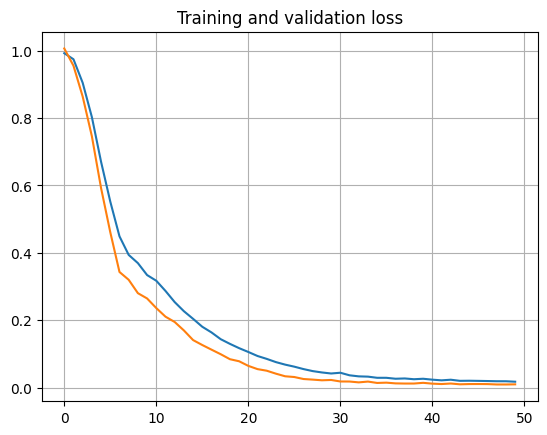

In [29]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(loss))

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.grid(True)


# Show the plot
plt.show()

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [60]:
test_folder = '/kaggle/input/frames5/Frames'

# Get the list of image file names in the test folder
test_files = os.listdir(test_folder)

# Iterate over each image file, load it, preprocess it, and make predictions
predictions_list = []
for filename in test_files:
    img_path = os.path.join(test_folder, filename)
    img = image.load_img(img_path, target_size=(128, 128))  # Assuming the same target size as during training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    prediction = model.predict(img_array)
    predictions_list.append(prediction)

# Convert predictions list to a numpy array
predictions_array = np.array(predictions_list)

# Print predictions
print("Predictions:", predictions_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [[[0.7099353  0.6455762  0.31139737]]

 [[0.6930561  0.5828626  0.23659518]]

 [[0.28131706 0.73773557 0.6235472 ]]

 [[0.20542228 0.53204215 0.3873621 ]]

 [[0.24549767 0.63261616 0.5015218 ]]

 [[0.31078926 0.72458965 0.59314

In [61]:
predictions_array =np.squeeze(predictions_array)

In [62]:
predictions_array

array([[0.7099353 , 0.6455762 , 0.31139737],
       [0.6930561 , 0.5828626 , 0.23659518],
       [0.28131706, 0.73773557, 0.6235472 ],
       [0.20542228, 0.53204215, 0.3873621 ],
       [0.24549767, 0.63261616, 0.5015218 ],
       [0.31078926, 0.72458965, 0.59314466],
       [0.37451932, 0.6511587 , 0.46832106],
       [0.5050426 , 0.60234517, 0.34602556],
       [0.52273375, 0.6012322 , 0.3366742 ],
       [0.73428947, 0.6166684 , 0.26258543],
       [0.5179111 , 0.60170865, 0.33945066],
       [0.36195964, 0.66973346, 0.49830768],
       [0.20458241, 0.52958435, 0.38451007],
       [0.40641224, 0.6383685 , 0.4373059 ],
       [0.71877366, 0.5879483 , 0.23180172],
       [0.62457305, 0.48663977, 0.14081722],
       [0.28731662, 0.77169317, 0.6654509 ],
       [0.5077352 , 0.6001531 , 0.34194696],
       [0.63529885, 0.49073762, 0.14141324],
       [0.48032063, 0.5944543 , 0.34669247]], dtype=float32)

In [65]:
num_images = predictions_array.shape[0]

# Create a directory to save the images if it doesn't exist
output_folder = 'output_images2'
os.makedirs(output_folder, exist_ok=True)

for i in range(num_images):
    # Create a blank image array
    img_array = np.zeros((128, 128, 3))
    
    # Set mean values for each channel
    mean_r, mean_g, mean_b = predictions_array[i]
    img_array[:,:,0] = mean_r  # Red channel
    img_array[:,:,1] = mean_g  # Green channel
    img_array[:,:,2] = mean_b  # Blue channel
    
    
    # Save the image
    img_path = os.path.join(output_folder, f"image_{i+1}.png")
    plt.imsave(img_path, img_array)
    
    print(f"Image {i+1} saved successfully at: {img_path}")

Image 1 saved successfully at: output_images2/image_1.png
Image 2 saved successfully at: output_images2/image_2.png
Image 3 saved successfully at: output_images2/image_3.png
Image 4 saved successfully at: output_images2/image_4.png
Image 5 saved successfully at: output_images2/image_5.png
Image 6 saved successfully at: output_images2/image_6.png
Image 7 saved successfully at: output_images2/image_7.png
Image 8 saved successfully at: output_images2/image_8.png
Image 9 saved successfully at: output_images2/image_9.png
Image 10 saved successfully at: output_images2/image_10.png
Image 11 saved successfully at: output_images2/image_11.png
Image 12 saved successfully at: output_images2/image_12.png
Image 13 saved successfully at: output_images2/image_13.png
Image 14 saved successfully at: output_images2/image_14.png
Image 15 saved successfully at: output_images2/image_15.png
Image 16 saved successfully at: output_images2/image_16.png
Image 17 saved successfully at: output_images2/image_17.pn

In [66]:
!zip -r onenet_output_new1.zip /kaggle/working/output_images2


  adding: kaggle/working/output_images2/ (stored 0%)
  adding: kaggle/working/output_images2/image_20.png (deflated 60%)
  adding: kaggle/working/output_images2/image_6.png (deflated 60%)
  adding: kaggle/working/output_images2/image_15.png (deflated 60%)
  adding: kaggle/working/output_images2/image_11.png (deflated 60%)
  adding: kaggle/working/output_images2/image_16.png (deflated 60%)
  adding: kaggle/working/output_images2/image_1.png (deflated 60%)
  adding: kaggle/working/output_images2/image_3.png (deflated 60%)
  adding: kaggle/working/output_images2/image_5.png (deflated 60%)
  adding: kaggle/working/output_images2/image_19.png (deflated 60%)
  adding: kaggle/working/output_images2/image_10.png (deflated 60%)
  adding: kaggle/working/output_images2/image_14.png (deflated 59%)
  adding: kaggle/working/output_images2/image_8.png (deflated 60%)
  adding: kaggle/working/output_images2/image_13.png (deflated 60%)
  adding: kaggle/working/output_images2/image_7.png (deflated 60%)
 

In [67]:
predictions_array *= 255

print(predictions_array)

[[181.03351  164.62193   79.406334]
 [176.72931  148.62997   60.33177 ]
 [ 71.73585  188.12257  159.00453 ]
 [ 52.382683 135.67075   98.777336]
 [ 62.601906 161.31712  127.88807 ]
 [ 79.25126  184.77036  151.25189 ]
 [ 95.502426 166.04547  119.42187 ]
 [128.78587  153.59802   88.23652 ]
 [133.2971   153.31421   85.85192 ]
 [187.24382  157.25044   66.95928 ]
 [132.06732  153.4357    86.55992 ]
 [ 92.299706 170.78203  127.06846 ]
 [ 52.168514 135.044     98.050064]
 [103.635124 162.78397  111.513   ]
 [183.28728  149.92682   59.10944 ]
 [159.26613  124.09314   35.908394]
 [ 73.26574  196.78175  169.68997 ]
 [129.47247  153.03903   87.19647 ]
 [162.0012   125.13809   36.060375]
 [122.48176  151.58585   88.40658 ]]


In [69]:
print(predictions_array[0])

[181.03351  164.62193   79.406334]


In [68]:

def color_correction(img, desired_means):
    # Calculate current mean values
    current_means = np.mean(img, axis=(0, 1))

    # Calculate correction factors
    correction_factors = desired_means / current_means

    # Apply correction
    corrected_img = img * correction_factors

    # Clip values to ensure they are within valid range [0, 255]
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)

    return corrected_img

In [71]:
input_folder = '/kaggle/input/frames5/Frames/'
output_folder = 'corrected_images/'
os.makedirs(output_folder, exist_ok=True)

for i, filename in enumerate(os.listdir(input_folder)):
    # Load image
    img_path = os.path.join(input_folder, filename)
    image = cv2.imread(img_path)
    # Perform color correction
    corrected_image = color_correction(image, predictions_array[i])

    # Save corrected image
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, corrected_image)

    print(f"Color correction applied to {filename} and saved as {output_path}")


Color correction applied to 11.png and saved as corrected_images/11.png
Color correction applied to 4.png and saved as corrected_images/4.png
Color correction applied to 9.png and saved as corrected_images/9.png
Color correction applied to 14.png and saved as corrected_images/14.png
Color correction applied to 1.png and saved as corrected_images/1.png
Color correction applied to 20.png and saved as corrected_images/20.png
Color correction applied to 2.png and saved as corrected_images/2.png
Color correction applied to 10.png and saved as corrected_images/10.png
Color correction applied to 18.png and saved as corrected_images/18.png
Color correction applied to 12.png and saved as corrected_images/12.png
Color correction applied to 7.png and saved as corrected_images/7.png
Color correction applied to 17.png and saved as corrected_images/17.png
Color correction applied to 5.png and saved as corrected_images/5.png
Color correction applied to 3.png and saved as corrected_images/3.png
Color 

In [72]:
!zip -r correct_img.zip /kaggle/working/corrected_images

  adding: kaggle/working/corrected_images/ (stored 0%)
  adding: kaggle/working/corrected_images/20.png (deflated 11%)
  adding: kaggle/working/corrected_images/7.png (deflated 15%)
  adding: kaggle/working/corrected_images/14.png (deflated 7%)
  adding: kaggle/working/corrected_images/4.png (deflated 9%)
  adding: kaggle/working/corrected_images/2.png (deflated 7%)
  adding: kaggle/working/corrected_images/11.png (deflated 5%)
  adding: kaggle/working/corrected_images/19.png (deflated 10%)
  adding: kaggle/working/corrected_images/15.png (deflated 16%)
  adding: kaggle/working/corrected_images/5.png (deflated 6%)
  adding: kaggle/working/corrected_images/12.png (deflated 7%)
  adding: kaggle/working/corrected_images/6.png (deflated 5%)
  adding: kaggle/working/corrected_images/18.png (deflated 15%)
  adding: kaggle/working/corrected_images/10.png (deflated 16%)
  adding: kaggle/working/corrected_images/1.png (deflated 3%)
  adding: kaggle/working/corrected_images/13.png (deflated 8%)
